In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Replacing missing values
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.median(), inplace=True)

# Verify again for missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


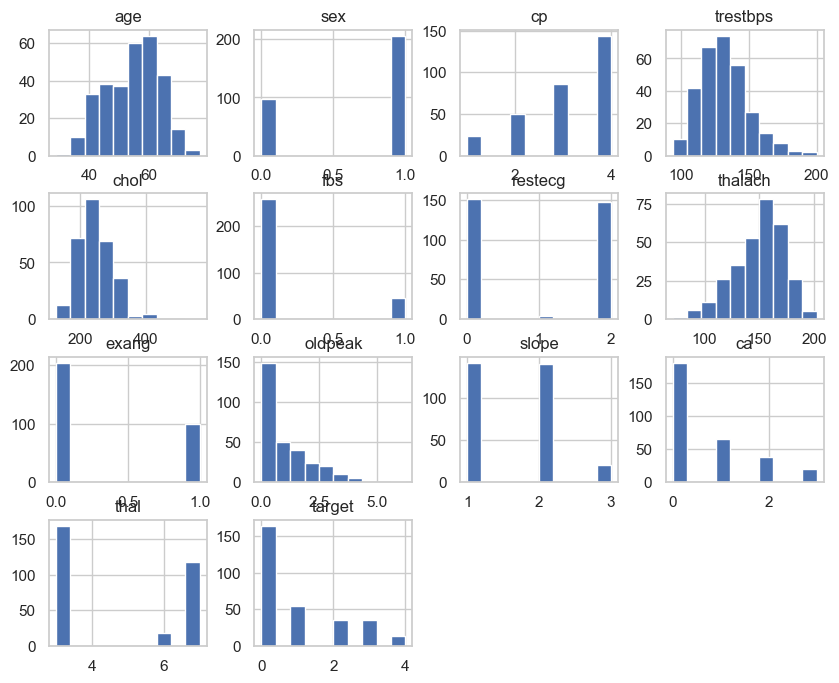

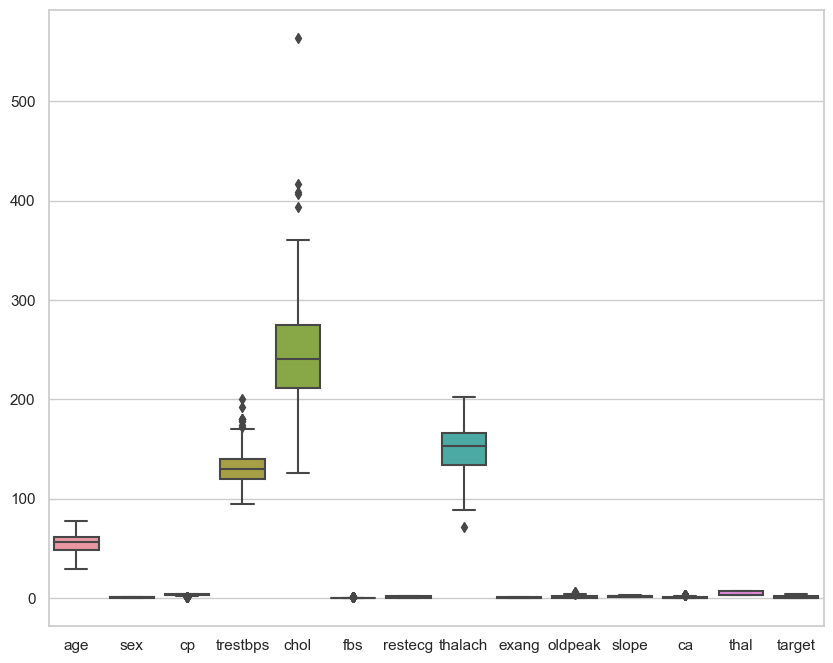

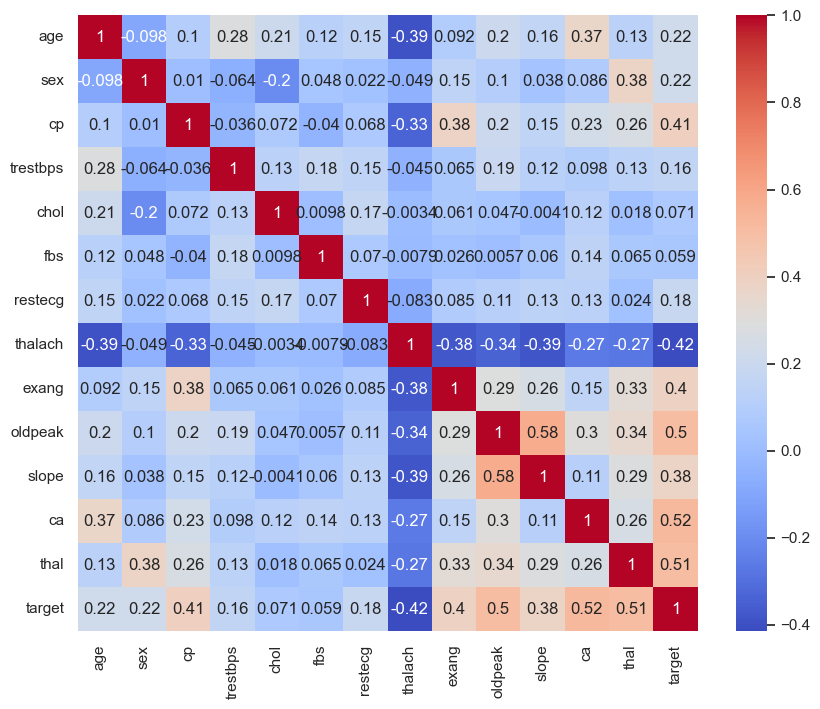

C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


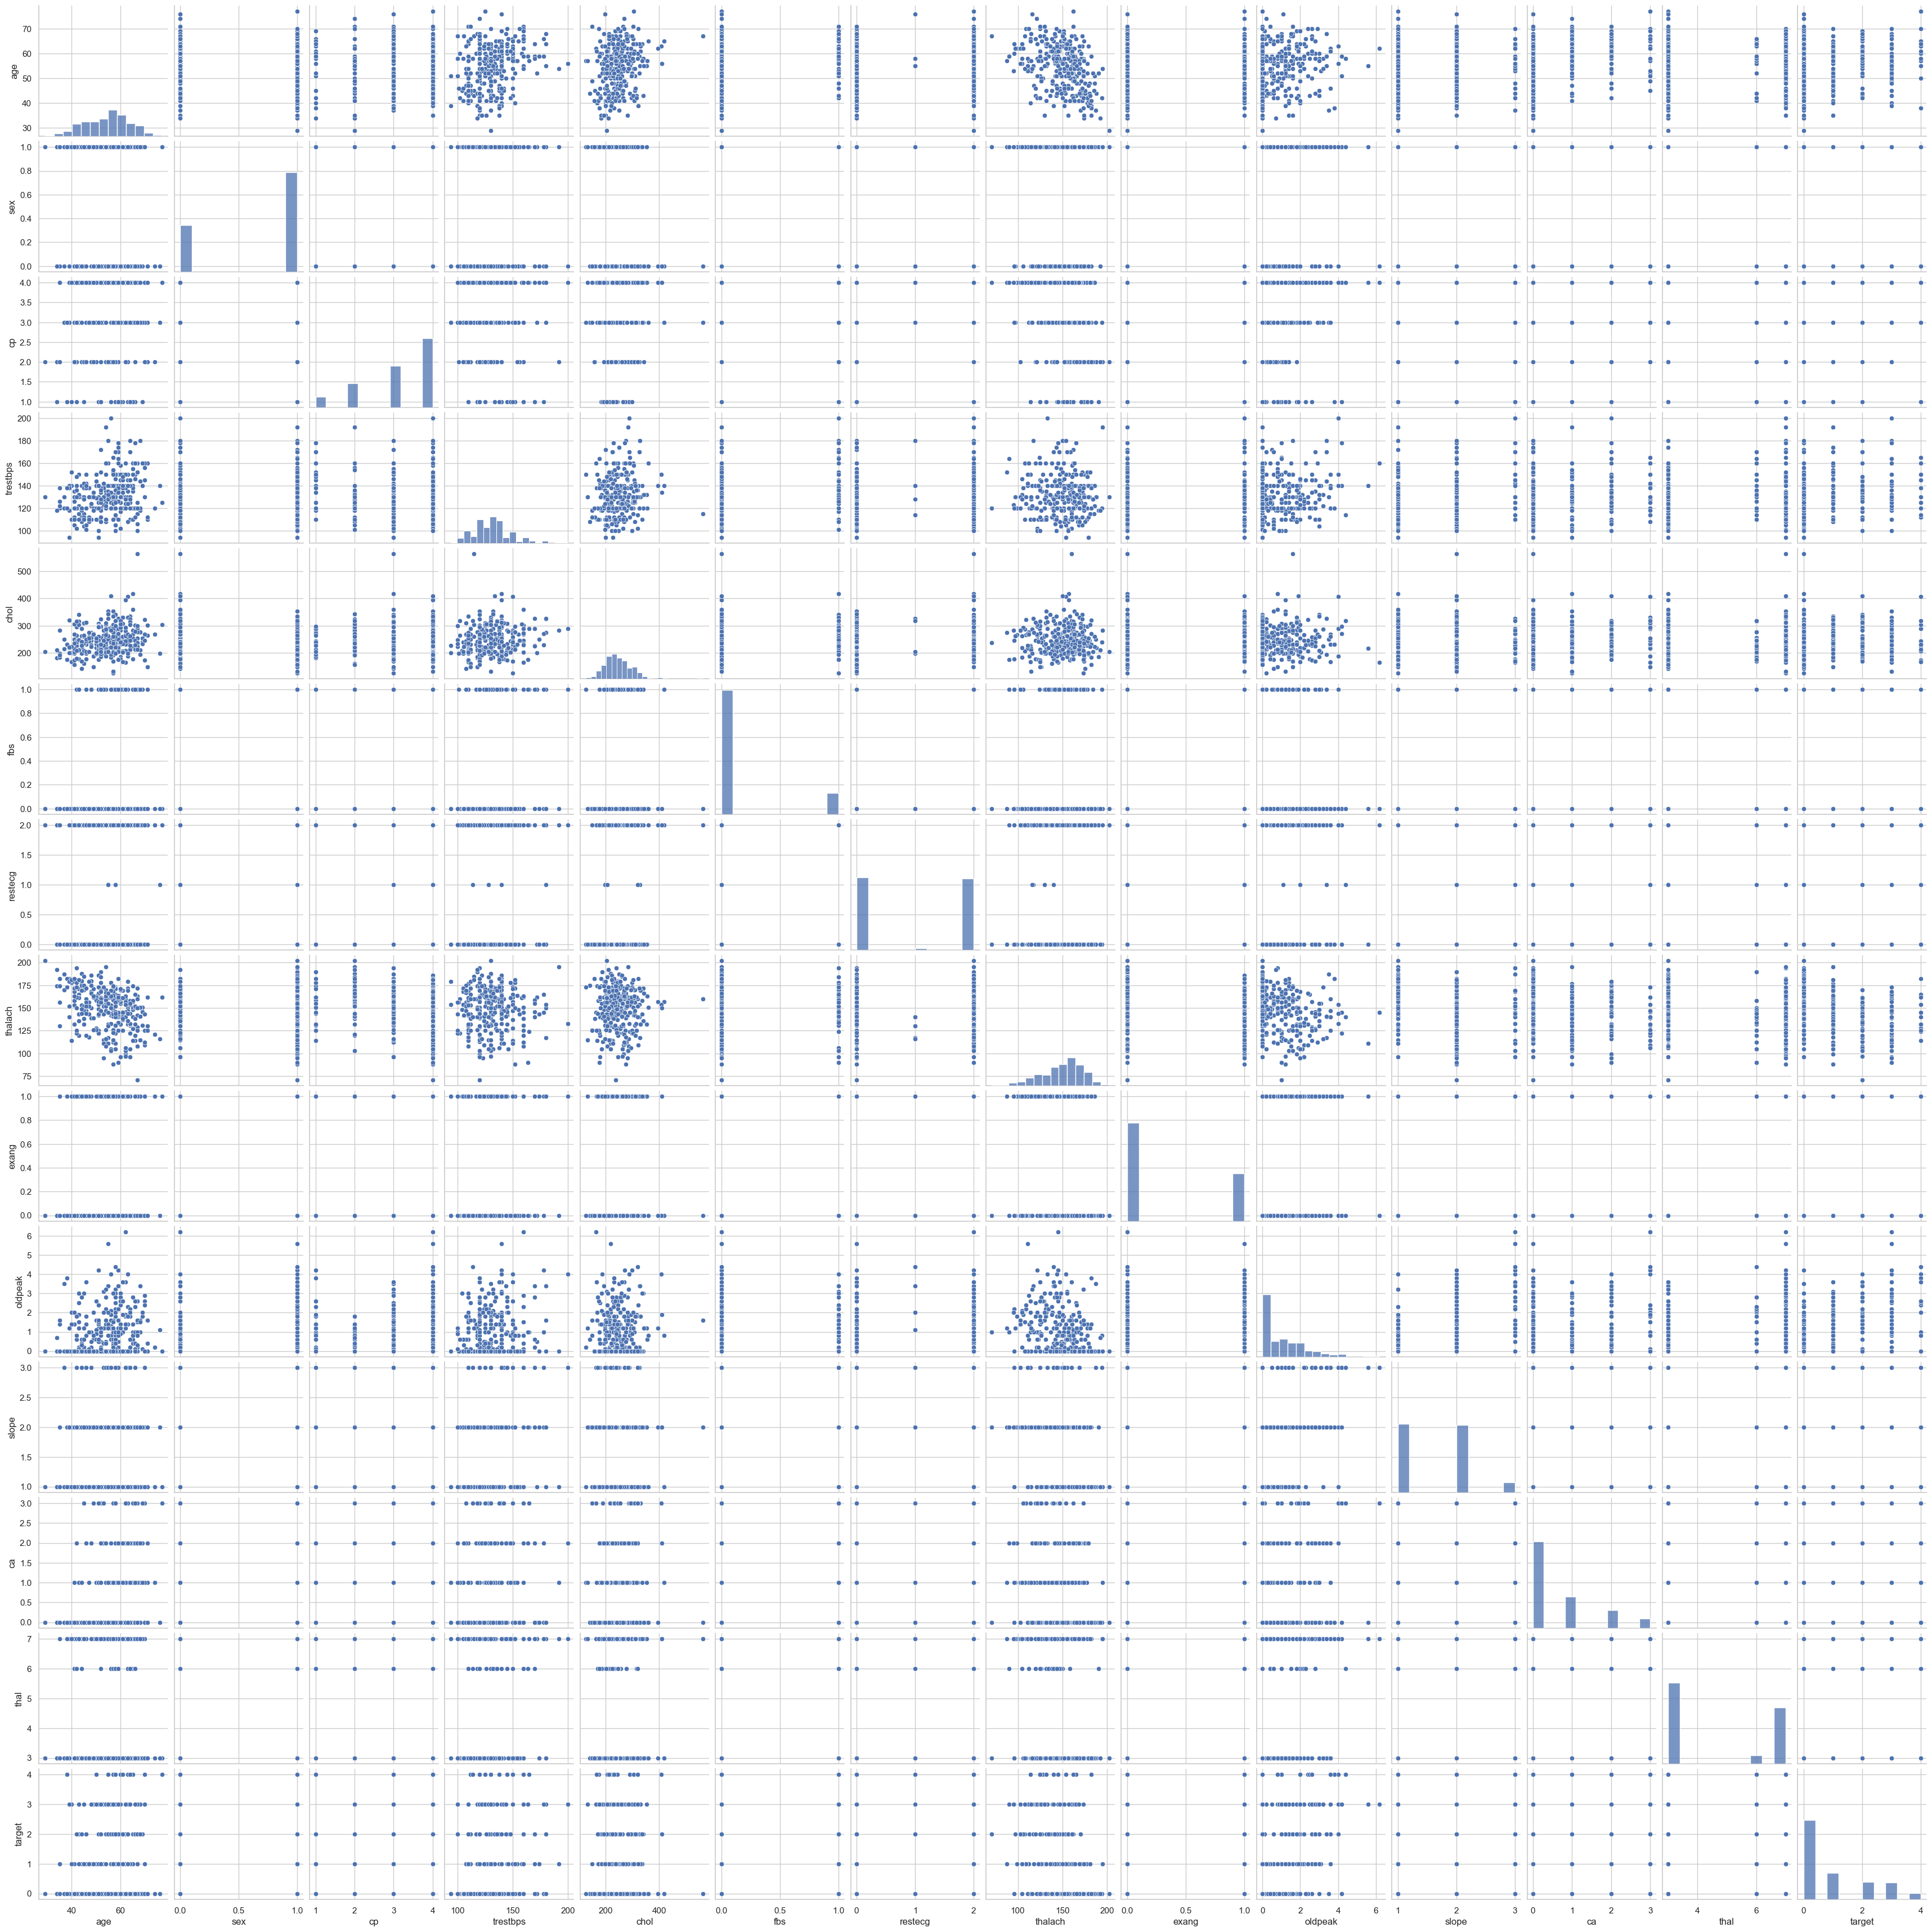

In [5]:
# Step 5: Data Visualization
# Histograms for numerical columns
df.hist(figsize=(10, 8))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df)
plt.show()


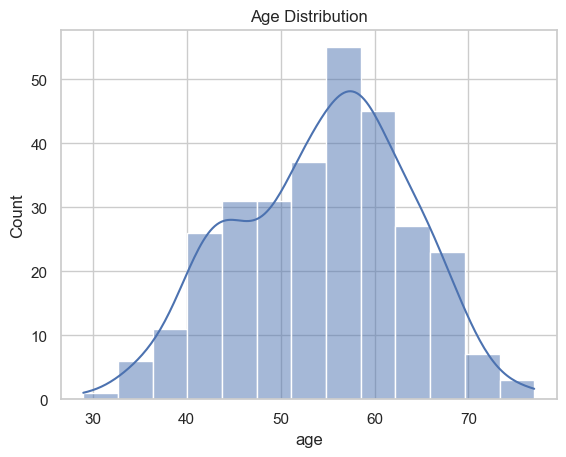

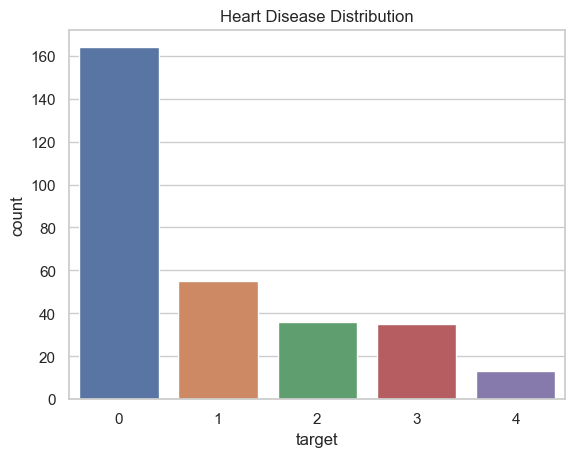

In [6]:
# Step 6: Univariate Analysis
# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Count plot for target
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


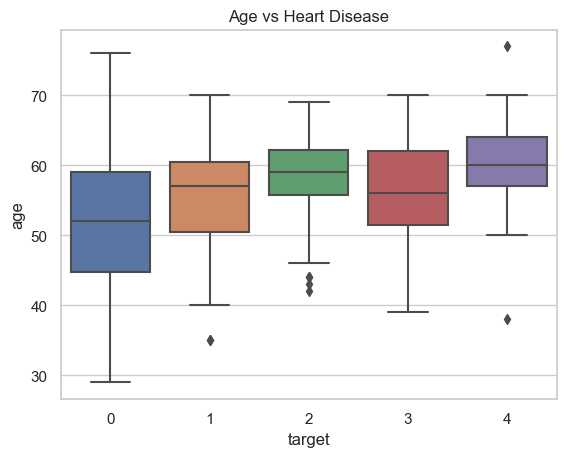

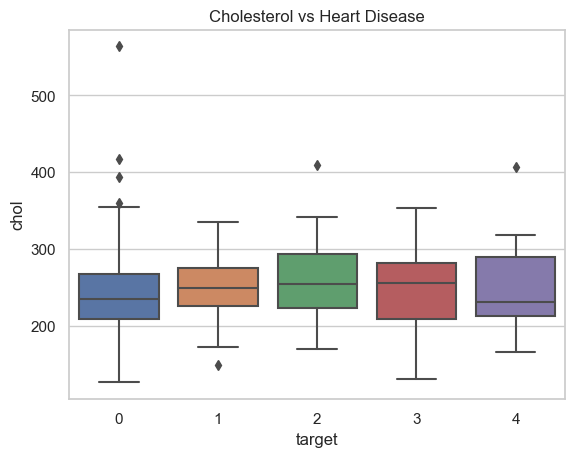

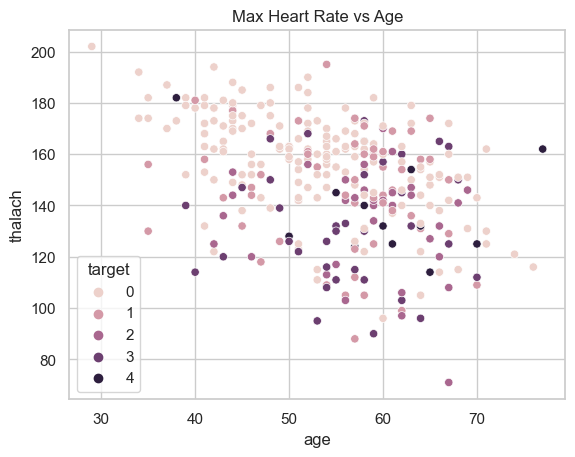

In [7]:
# Step 7: Bivariate Analysis
# Age vs Target
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

# Cholesterol vs Target
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol vs Heart Disease')
plt.show()

# Scatter plot of Max Heart Rate vs Age
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Max Heart Rate vs Age')
plt.show()


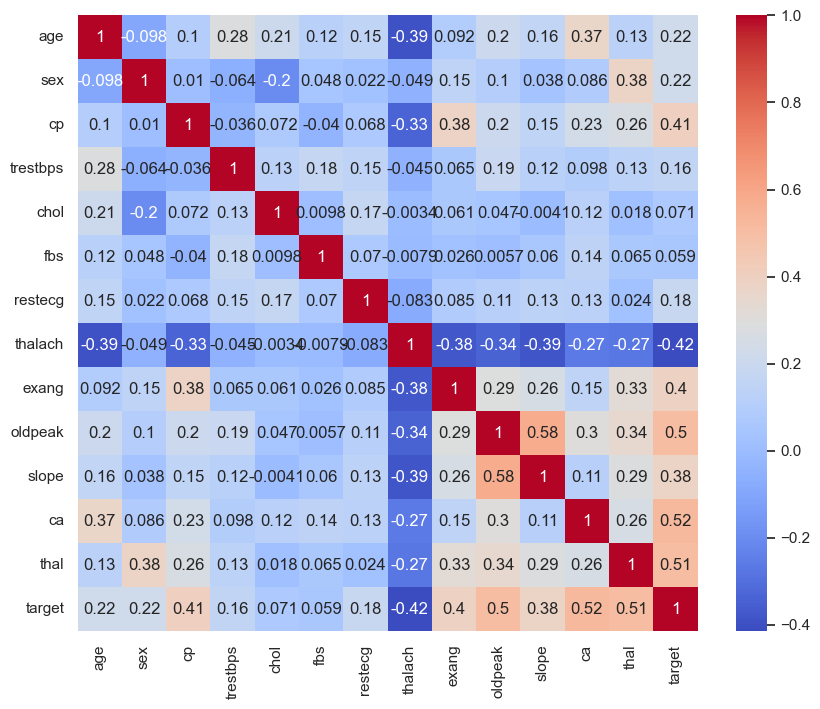

C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


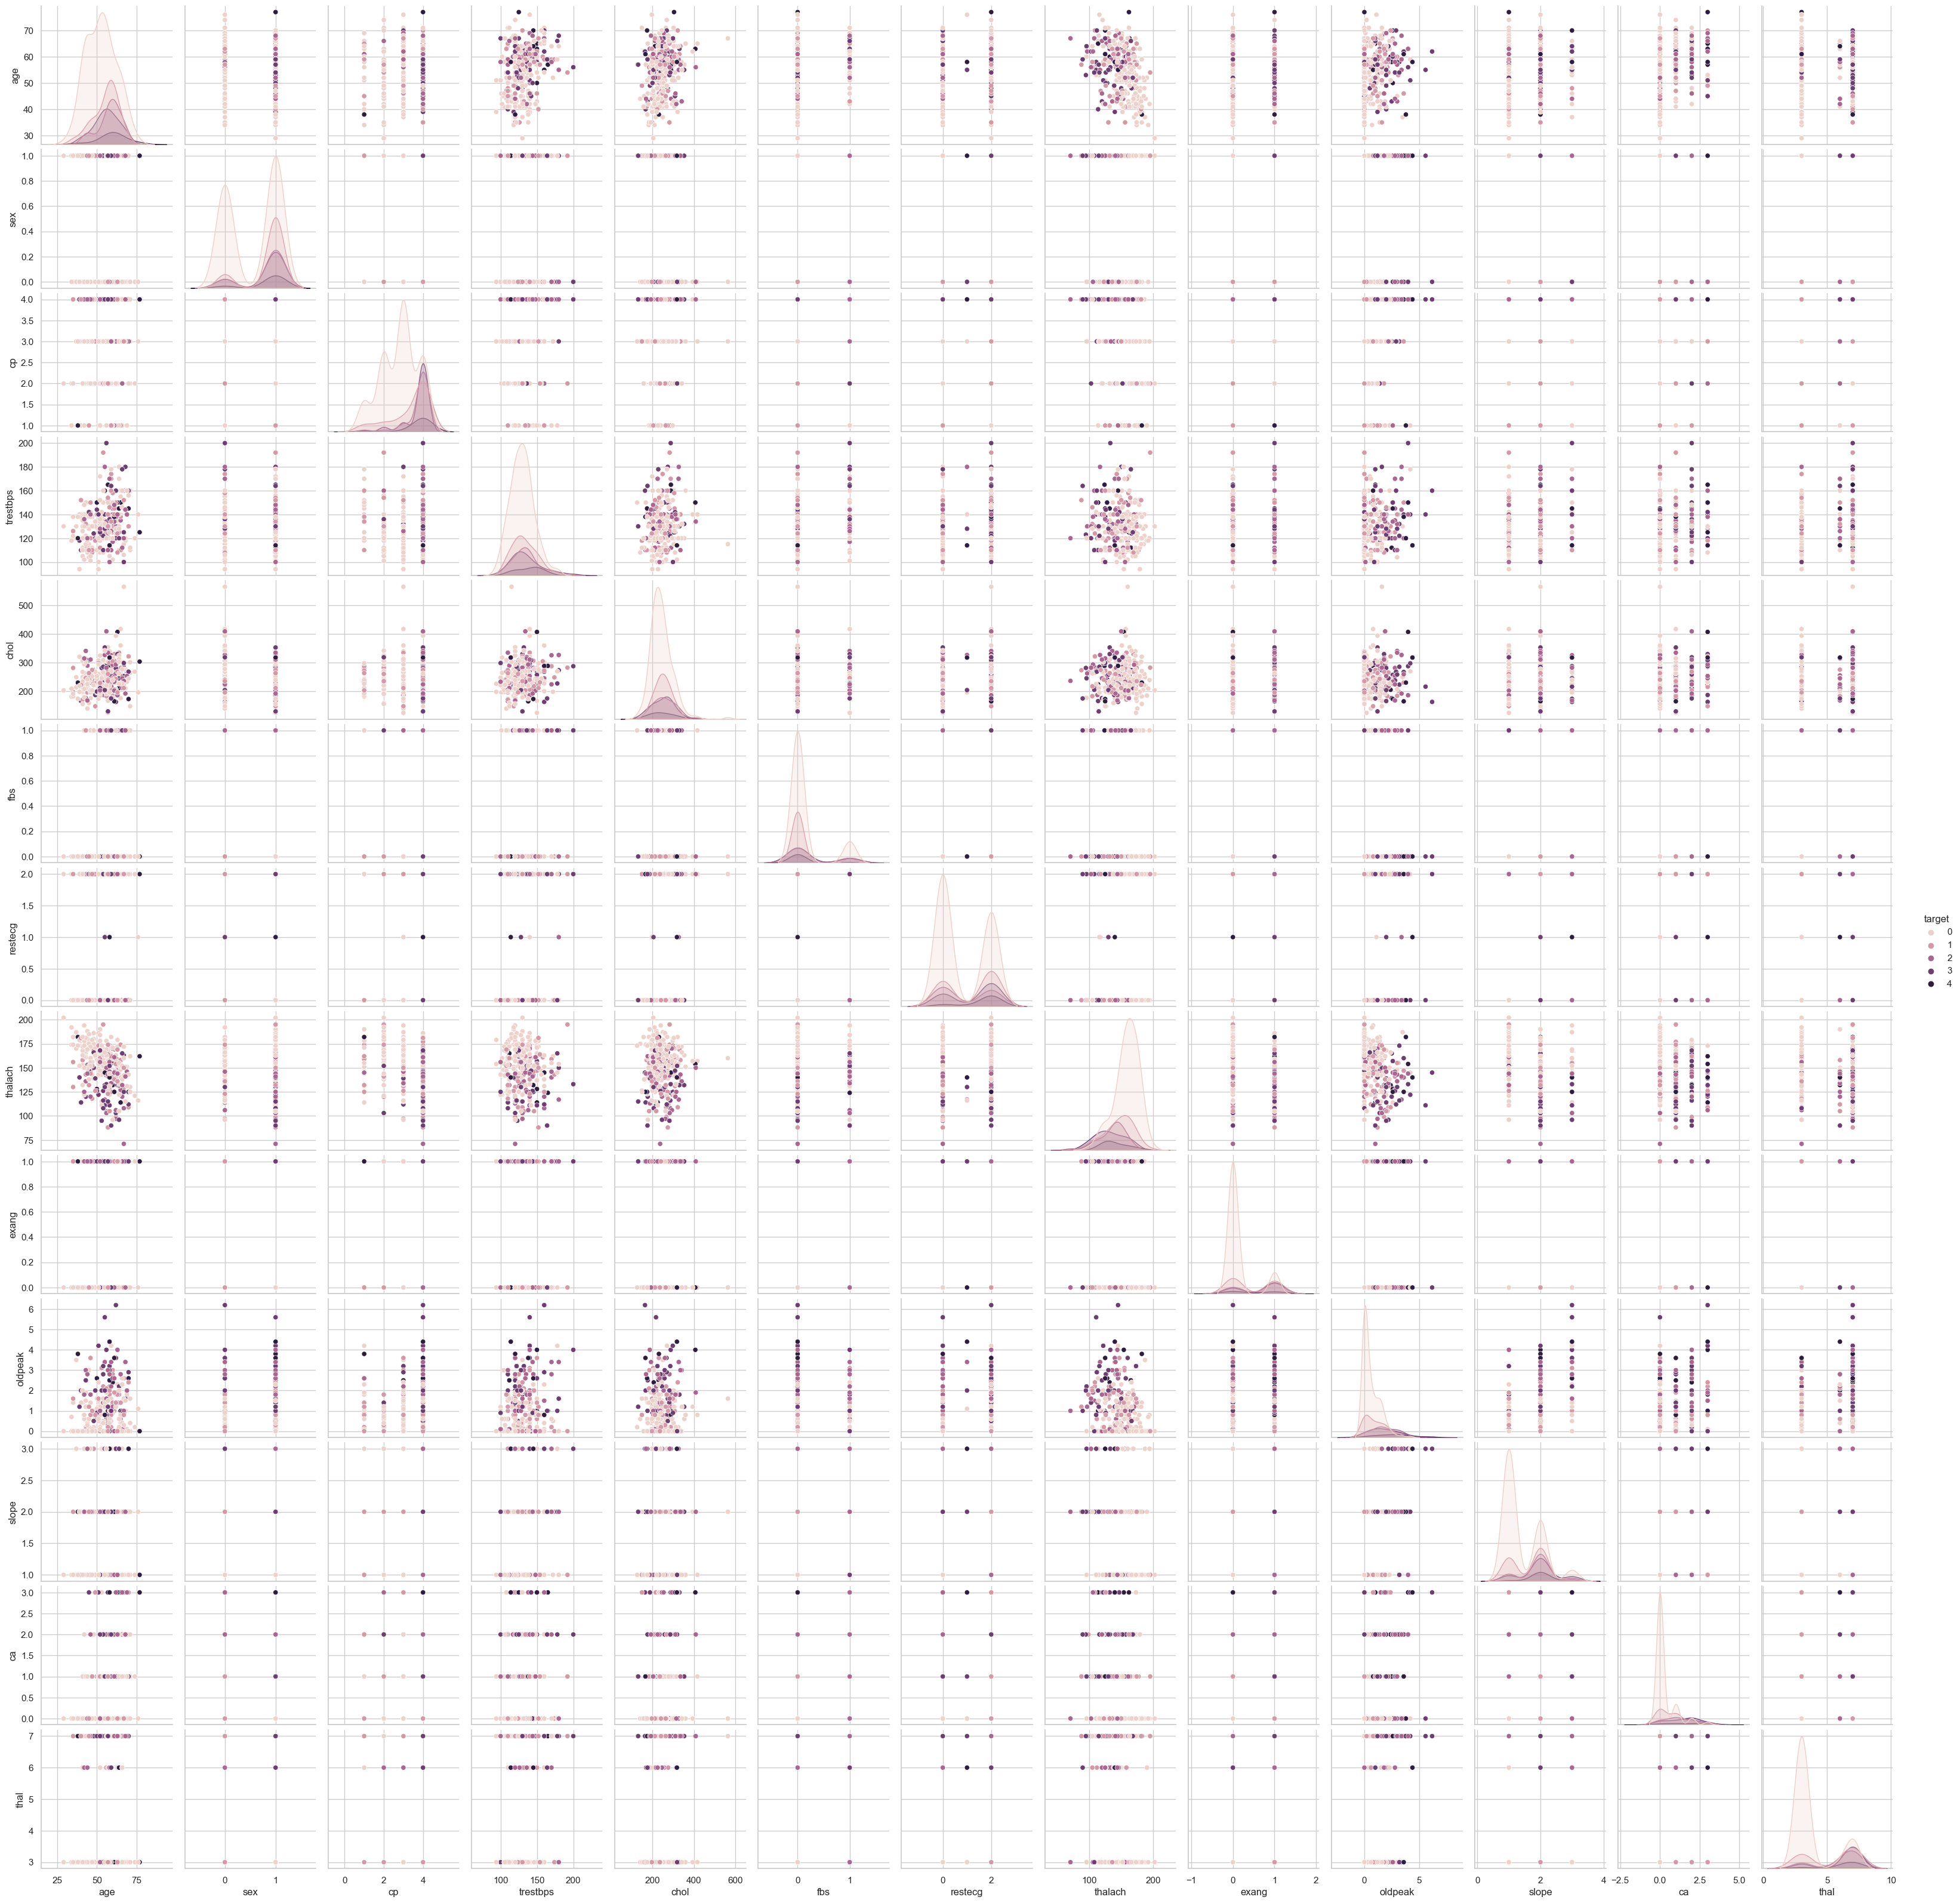

In [8]:
# Step 8: Multivariate Analysis
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for multiple variables
sns.pairplot(df, hue='target')
plt.show()


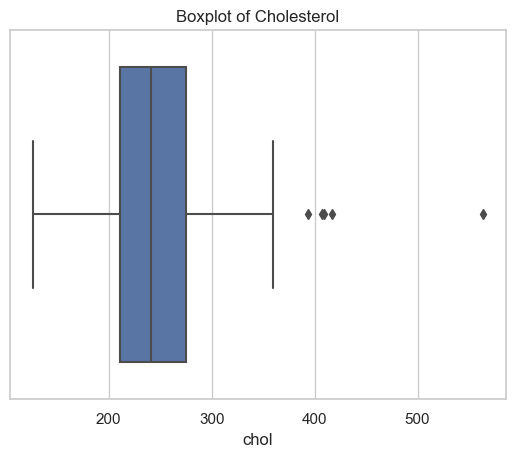

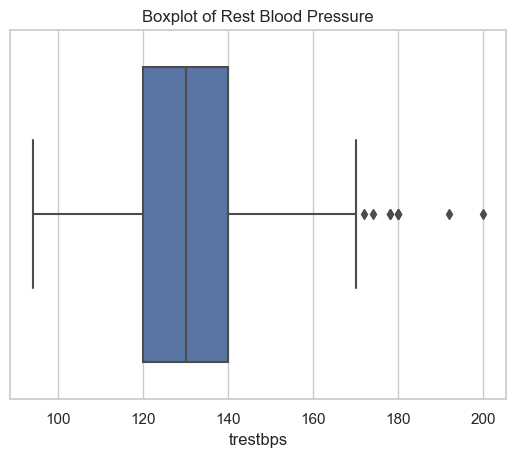

In [9]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in cholesterol
sns.boxplot(x=df['chol'])
plt.title('Boxplot of Cholesterol')
plt.show()

# Removing outliers from cholesterol
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in rest blood pressure
sns.boxplot(x=df['trestbps'])
plt.title('Boxplot of Rest Blood Pressure')
plt.show()

# Removing outliers from rest blood pressure
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['trestbps'] < (Q1 - 1.5 * IQR)) | (df['trestbps'] > (Q3 + 1.5 * IQR)))]


Step 10: Feature Engineering
For this dataset, we can create a new feature for Body Mass Index (BMI) if we had height and weight data, but we will proceed with the current features.

In [10]:
#Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Heart disease vs Age
heart_disease_age = df.groupby('target')['age'].mean()
print(f"Average Age by Heart Disease Presence:\n{heart_disease_age}")

# Heart disease vs Cholesterol
heart_disease_chol = df.groupby('target')['chol'].mean()
print(f"Average Cholesterol by Heart Disease Presence:\n{heart_disease_chol}")

# Heart disease vs Max Heart Rate
heart_disease_thalach = df.groupby('target')['thalach'].mean()
print(f"Average Max Heart Rate by Heart Disease Presence:\n{heart_disease_thalach}")

# Heart disease vs Rest Blood Pressure
heart_disease_trestbps = df.groupby('target')['trestbps'].mean()
print(f"Average Rest Blood Pressure by Heart Disease Presence:\n{heart_disease_trestbps}")


Key Insights:
Average Age by Heart Disease Presence:
target
0    52.246835
1    55.339623
2    58.176471
3    55.312500
4    59.416667
Name: age, dtype: float64
Average Cholesterol by Heart Disease Presence:
target
0    238.126582
1    248.471698
2    252.882353
3    244.875000
4    240.583333
Name: chol, dtype: float64
Average Max Heart Rate by Heart Disease Presence:
target
0    158.474684
1    145.056604
2    135.705882
3    130.437500
4    139.500000
Name: thalach, dtype: float64
Average Rest Blood Pressure by Heart Disease Presence:
target
0    128.303797
1    131.377358
2    132.852941
3    130.718750
4    137.833333
Name: trestbps, dtype: float64


Findings:
1. Age Distribution: The average age of patients with heart disease is slightly higher than those without heart disease.
2. Cholesterol Levels: Patients with heart disease tend to have higher average cholesterol levels.
3. Max Heart Rate: The maximum heart rate achieved during exercise tends to be lower for patients with heart disease.
4. Resting Blood Pressure: Patients with heart disease tend to have higher resting blood pressure.